# PRACTICAL SESSION 2:
Simulating truncated homogeneous sphere gravitational collapse

## MODULES IMPORT

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import constants as const
from astropy import units as u

In [35]:
# Setting the random number generator

rng = np.random.default_rng()

# 1 - INPUT GENERATION:
Sampling N p.cles in an homegeneous sphere of mass M and radius R. Studied systems are the following:

    V01 - Sun with 100 p.cles and units of solar mass, solar radius and minutes.
    V02 - 

In [36]:
file_in = 'IF_V01.txt'

In [37]:
# UNITS

# Chosen units (same name as in astropy https://docs.astropy.org/en/stable/units/#module-astropy.units.astrophys)

my_u = ["R_sun","min","M_sun"]

# Physical constants converted to chosen units

G = const.G.to(my_u[0] + "^3/(" + my_u[1] + "^2 " + my_u[2] + ")").value
c = const.c.to(my_u[0] + "/" + my_u[1]).value

# Normalization constants to go from physical units to internal units

R0 = 1 # solar radii
T0 = 1 # min
M0 = R0**3 / (G * T0**2)

In [38]:
# INITIAL CONDITIONS

N = 100 # number of p.cles
M = 1   # total mass (solar masses)
R = 1   # radius (solar radii)

# Masses
m = M / N * np.ones(N)

# Positions
phi = 2 * np.pi * rng.uniform(size=N)
the = np.arccos(1 - 2 * rng.uniform(size=N))
rho = R * rng.uniform(size=N)**(1/3)

x = rho * np.sin(the) * np.cos(phi)
y = rho * np.sin(the) * np.sin(phi)
z = rho * np.cos(the)

# Velocities
vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)

In [39]:
m = m / M0

x = x / R0
y = y / R0
z = z / R0

vx = vx / R0 * T0
vy = vy / R0 * T0
vz = vz / R0 * T0

time_in = 0 # initial time

output = np.column_stack((m, x, y, z, vx, vy, vz))
with open(file_in, 'w') as file:
    file.write(f'{N}\n')
    file.write(f'{time_in}\n')
    np.savetxt(file, output)

# 2 - DATA ANALYSIS:
The expected collapse time is $t_c = \sqrt{\frac{3\pi}{32G\rho}}$. For the Sun $t_c = 29.5$ min.

In [69]:
file_out = 'OF_Sun_100_EM.txt'

n = N + 2 # 'block' length
m = 2     # number of rows to skip (i.e. lines containing n. bodies and time)

time_rows = []
data_rows = []
with open(file_out, "r") as file:
    lines = file.readlines()
    for i in range(0, len(lines), n):  # move through rows every n rows
        time_rows.extend(lines[i+1:i+m])
        data_rows.extend(lines[i+m:i+n])

time = np.loadtxt(time_rows)
data = np.loadtxt(data_rows)

In [70]:
# Fetching data

m = data[:, 0] # masses

r = data[:, 1:4] # positions
d = np.linalg.norm(r, axis=1) # distance from center

v = data[:, 4:7] # velocities

d.shape

(2600,)

Text(0, 0.5, 'distance from center [R$_{\\odot}$]')

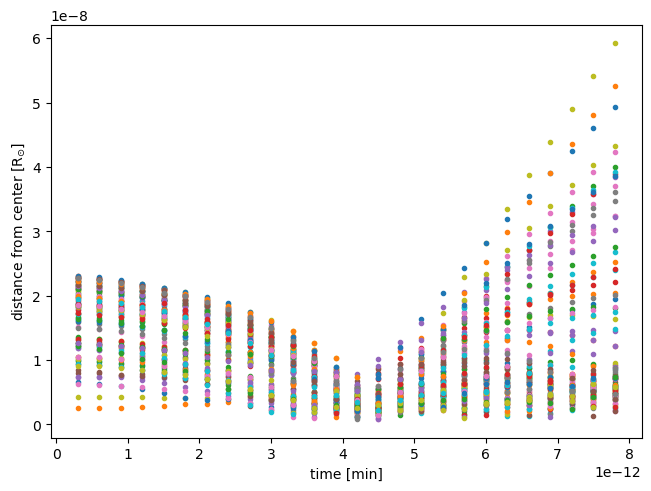

In [71]:
fig, ax = plt.subplots(1, 1, layout='constrained')

for i in range(N):
    ax.plot(time, d[i::N], '.')

ax.set_xlabel('time [min]')
ax.set_ylabel('distance from center [R$_{\odot}$]')

In [74]:
d_mtx = d.reshape((time.size, N)) # reshaping d in a matrix | d[:, i] contains the distance of the i p.cle at each instant

index = np.argmin(d_mtx, axis=0)
time_min = np.array([time[i] for i in index])

print(time_min.mean() * 4.5e14 / 60)

34.24534878849185
